# Laboratório 1 – Projeto Buscas

## Tarefa 2.1 - Grid Search

**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial – CMC-15**

**Professores:** 

Paulo André Castro

Paulo Marcelo Tasinaffo

**Alunos:**

Álvaro Tedeschi Neto

Davi Muniz de Vasconcelos

Gabriel Henrique Gobi

Thiago Lopes de Araujo

---

In [1]:
# Import de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import heapq
from math import inf, sqrt

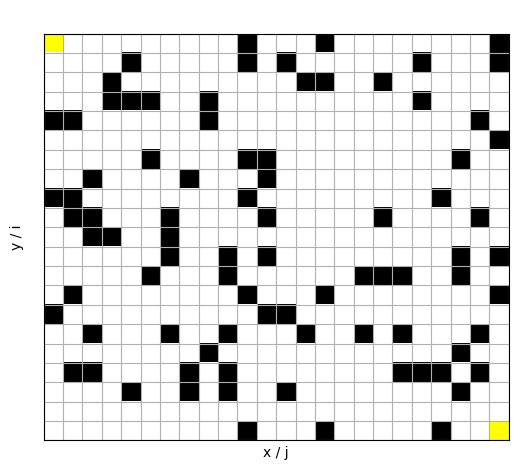

In [2]:
# Representando o grid como uma matriz de 0's e 1's com 1's representando obstáculos

grid = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
                [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
                [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
                [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

grid = np.copy(grid)
grid[0, 0] = 2 # start
grid[20, 23] = 2 # goal
newcolors = np.array([[1, 1, 1, 1],
                      [0, 0, 0, 1],
                      [1, 1, 0, 1]])
newcmp = ListedColormap(newcolors)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(grid, cmap=newcmp)
ax.set_xlim([-0.5, 23.5])
ax.xaxis.set_ticks(np.arange(-0.5, 24.5, 1))
ax.xaxis.set_ticklabels([' ']*25)
ax.set_xlabel('x / j')
ax.set_ylim([20.5, -0.5])
ax.yaxis.set_ticks(np.arange(-0.5, 21.5, 1))
ax.yaxis.set_ticklabels([' ']*22)
ax.set_ylabel('y / i')
ax.tick_params(top = False, left = False, bottom = False)
ax.grid()

Modelando como um problema de busca na matriz acima, podemos formular como:

- **Estados**: posições $(j, i)$ , com $0 \leq j \leq 23$ e $0 \leq i \leq 20$

- **Operadores**:\
$(j, i) \rightarrow (j, i+1)$ (Norte)                 
$(j, i) \rightarrow (j, i-1)$ (Sul)\
$(j, i) \rightarrow (j+1, i)$ (Leste)\
$(j, i) \rightarrow (j-1, i)$ (Oeste)

- **Teste do objetivo**: atingir a posição (20, 23)
                  
- **Custo da trajetória**: 1 por movimento

Agora vamos escrever estruturas de dados para a implementação do grafo de busca:

In [3]:
class Node():
    """
    Nó para representar um estado da árvore de busca no grid.
    """
    def __init__(self, j=0, i=0):
        """
        Cria um nó para um estado da árvore de busca no grid.

        :param i: linha do nó no grid.
        :type i: int.
        :param j: coluna do nó no grid.
        :type j: int.
        """
        self.i = i
        self.j = j
        self.f = inf
        self.g = inf
        self.parent = None

    def get_position(self):
        """
        Retorna a posição do nó no grid de ocupação.

        :return: (j, i), coluna e linha, respectivamente.
        :rtype: 2D int tuple.
        """
        return self.j, self.i
       
    def __lt__(self, another_node):
        """
        Operador de comparação para ordenação na priority queue.
        """
        if self.i < another_node.i:
            return True
        if self.j < another_node.j:
            return True
        return False

In [33]:
start_position = (0, 0)
goal_position = (23, 20)

In [45]:
def a_star(grid, start_position, goal_position):
        """
        Algoritmo A*.

        :param start_position: posição inicial do grid (j, i).
        :type start_position: tuple.
        :param goal_position: posição objetivo do grid (j, i).
        :type goal_position: tuple.
        :return: array de nós representando o caminho encontrado pela busca e o custo.
        :rtype: array de Node's e float.
        """
        
        pq = []  # lista vazia para a priority queue
        visited = np.copy(grid)
        
        start = Node(*start_position)  # start Node
        goal = Node(*goal_position)  # goal Node
        
        
        j, i = start.get_position()
        visited[i, j] = 1

        
        start.g = 0
        start.f = manhattan_dist(start, goal)
        
        heapq.heappush(pq, (start.f, start))
        
        count = 0
        
        while pq:
    
            cost, node = heapq.heappop(pq)
            j, i = node.get_position()
            if (j, i) == goal_position:
                return [], cost
            
            visited[i, j] = 1
            
            for dj, di in [(0, +1), (0, -1), (+1, 0), (-1, 0)]:
                
                if (j+dj >= 0 and j+dj <= 23) and \
                (i+di >= 0 and i+di <= 20) and \
                (grid[i+di, j+dj] != 1): 
                    successor = Node(j+dj, i+di)
                else:
                    successor = Node(j, i)
                
                j_s, i_s = successor.get_position()
                if visited[i_s, j_s] != 1:
                        successor.g = node.g + 1
                        successor.f = successor.g + manhattan_dist(successor, goal)
                        successor.parent = node
                        heapq.heappush(pq, (successor.f, successor))
                                    
        return [], inf
    
def manhattan_dist(nodeA, nodeB):
    xA, yA = nodeA.get_position()
    xB, yB = nodeB.get_position()
    return np.abs(xA-xB) + np.abs(yA-yB)

def euclidean_dist(nodeA, nodeB):
    xA, yA = nodeA.get_position()
    xB, yB = nodeB.get_position()
    return np.sqrt((xA-xB)**2 + (yA-yB)**2)

In [44]:
start_position = (0, 0)
goal_position = (23, 20)
path, cost = a_star(grid, start_position, goal_position)
print(cost)

Custo final:  43
43


In [ ]:
# plot_path(cost_grid, start_position, goal_position, path)